In [1]:
# 後ほど図を描画するために使います
# 先に実行しておいて下さい

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

# 6. Digit Recognizer

まずデータを読み込みます（データの詳細については5つめのNotebookを確認して下さい）

In [2]:
# データの読み込み

import gzip
import pickle

f = gzip.open('mnist.pkl.gz', 'rb')
train_set, _, test_set = pickle.load(f, encoding='latin1')

X, y =train_set
X_test, y_test = test_set

3つめのNotebookで取り上げた分類器と同様に，`scikit-learn` の中にはニューラルネットワークの分類器が既に存在しています．  
しかし実はNeural Networkの入った `scikit-learn` が開発バージョンだったという事が判明したので，ここでは `scikit-learn` ライクに使えるNeural Networkのコードを書いたのでこちらを流用します．

以下を実行して下さい．

In [3]:
from neural_network import NeuralNetwork

classifier = NeuralNetwork(input_size=784, output_size=10, hidden_size=324)

`classifier.fit` を利用して，データから分類規則を学習してみましょう（※とっても重いです）    
※詰まる方は3つ目のNotebookに戻っておさらいしましょう

In [4]:
# データから分類規則を学習
classifier.fit(X, y)

classifier.score を利用してテストデータに対する分類の精度を数値で確認してみましょう．  
※詰まる方は3つ目のNotebookに戻っておさらいしましょう

In [5]:
# テストデータに対する分類の正解率 [%]
classifier.score(X_test, y_test)

0.9267

かなり高い精度で数字を認識できることが分かりました！  

`classifier.predict` に手書き数字のデータを渡すと，そこから予測された数字を返してくれます．  
以下を実行してみて下さい．

In [6]:
classifier.predict(X_test[0])

7

予測結果は正しかったでしょうか？対応する `y_test` のデータを確認してみましょう．  
以下を実行してみて下さい．

In [7]:
y_test[0]

7

より詳しく結果を見るために，正解率の高い数字 / 低い数字を確認してみましょう．  
`X_test` ，`y_test`，`classifier.predict` を利用して実装して下さい．

In [8]:
# 数字ごとの正解率を確認しましょう

from collections import Counter

digit2cnt = Counter()
digit2okcnt = Counter()
test_size = X_test.shape[0]

for i in range(test_size):
    digit = y_test[i]
    
    digit2cnt[digit] += 1
    if digit == classifier.predict(X_test[i]):
        digit2okcnt[digit] += 1

sum_all = sum(digit2okcnt.values())
print("{0} / {1} = {2:2.2f}%".format(sum_all, test_size, 100. * sum_all / test_size))

print("\n---- 内訳 ----\n")
for digit in sorted(digit2okcnt.keys()):
    print("{0}: {1:04d} / {2:04d} = {3:2.2f}%".format(digit, digit2okcnt[digit], digit2cnt[digit], 100. * digit2okcnt[digit] / digit2cnt[digit]))

9267 / 10000 = 92.67%

---- 内訳 ----

0: 0961 / 0980 = 98.06%
1: 1111 / 1135 = 97.89%
2: 0929 / 1032 = 90.02%
3: 0943 / 1010 = 93.37%
4: 0875 / 0982 = 89.10%
5: 0768 / 0892 = 86.10%
6: 0908 / 0958 = 94.78%
7: 0959 / 1028 = 93.29%
8: 0875 / 0974 = 89.84%
9: 0938 / 1009 = 92.96%


どの画像をどう判定したのかざっくり確認してみましょう．  
以下を実行してみて下さい．

/Users/amacbee/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


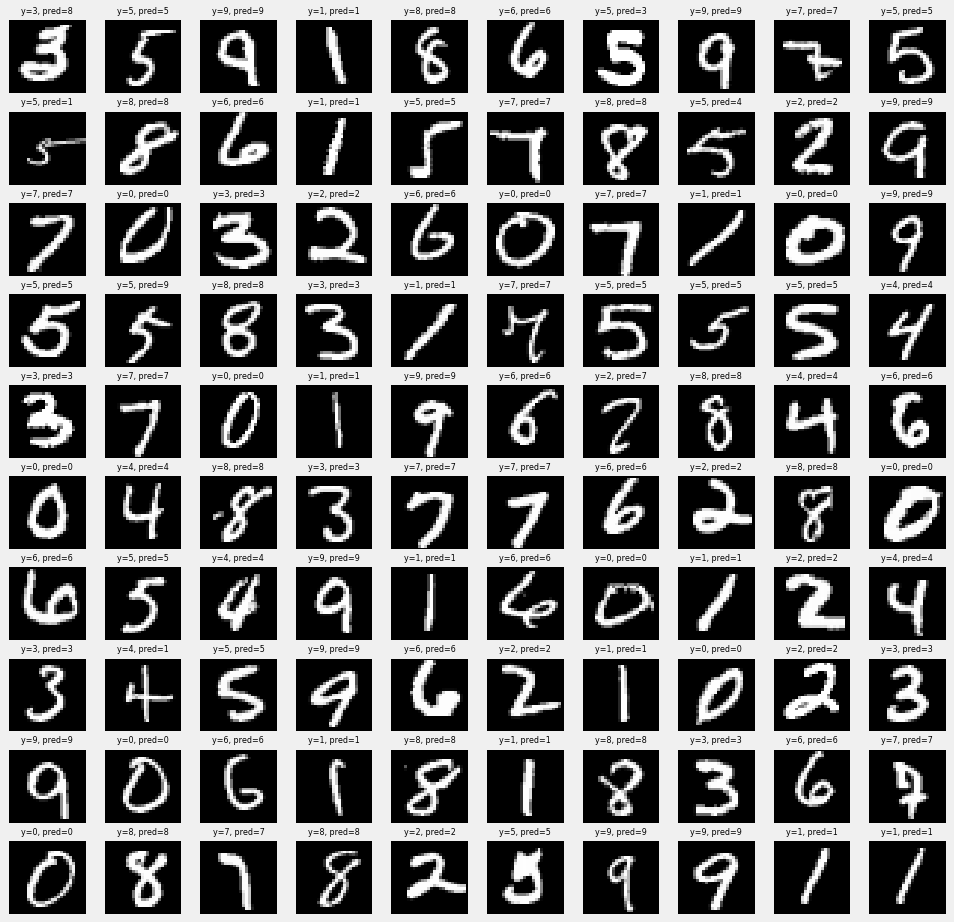

In [9]:
def draw_result(X, y, pred, cnt):
    size = 28
    Z = X.reshape(size, size)
    Z = Z[::-1,:]
    
    plt.subplot(10, 10, cnt)
    plt.xlim(0, size - 1)
    plt.ylim(0, size - 1)
    plt.pcolor(Z)
    plt.title("y={0}, pred={1}".format(y, pred), size=8)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

plt.figure(figsize=(15, 15))
for cnt, idx in enumerate(np.random.permutation(X_test.shape[0])[:100]):
    x = X_test[idx]
    pred = classifier.predict(x)
    draw_result(X_test[idx], y_test[idx], pred, cnt+1)
plt.show()

予測結果は正しいですか？  
間違えている数字があったとして，それはどのような数字でしょう．

最後に分類器を保存します．

In [10]:
classifier.save('neural_network.npz')